In [393]:
%pylab inline
from scipy import interpolate
from pywavan import powspec
import itertools
from scipy.stats import linregress
from pywavan import fan_trans
from random import randint

Populating the interactive namespace from numpy and matplotlib


In [394]:
n=9
p=1

'''
image size n x n with 'perturbance' "p"
returns image, matrix
where image is the n x n image and matrix is
an image cube of each scale of the image before summation
'''

total = 0
#total1 = 1
fmax=(2**(n))
imatrix = np.zeros((n-2,fmax,fmax))
coord=np.arange(fmax)
for i in range(2,n):
        f=(2**(i))
        a=(p**(i))
        randz=np.random.uniform(-1,1,size=(f,f))
        intt=[randint(0, fmax-1) for p in range(0, i)]
        x=np.linspace(0,fmax-1,f)
        y=np.linspace(0,fmax-1,f)
        g=interpolate.RectBivariateSpline(y,x,randz)
        intmat=g(coord,coord)*a
        total=(intmat)+total
        #total1=(intmat+2)*total1
        imatrix[i-2,:,:]=intmat




In [395]:
n=10
p=1

'''
additive
'''

total1 = 0
lam=2 #number of division for each side of the square
#beta=(lam**2-1)/lam**2
beta=0
fmax=(2**(n))

coord=np.arange(fmax)

n1=math.floor(math.log(fmax,lam))
imatrix = np.zeros(((n1+1)-2,fmax,fmax))

for i in range(2,(n1+1)):
        
        f=(lam)**i 
        a=(p**(i))
        randz=np.random.uniform(-1,1,size=(f,f))
        #randz=1/beta*np.ones((f,f))
        '''
        xint = [randint(0, f) for p in range(0, int((f**2)*(1-beta)))]
        yint = [randint(0, f) for p in range(0, int((f**2)*(1-beta)))]
        randz[yint,xint]=0
        '''
        #intt=[np.random.randint(0, f-1,size=2) for p in range(0, int((f*(1-beta))**2)-1)]
        intt=np.random.randint(0, f,size=(int((f**2)*(1-beta)),2))
        intt=np.transpose(intt).tolist()
        randz[intt]=0
        
        # The grid (x,y) is the center of the squares in Yaglom's model
        x0=(fmax-1)/(2*f)
        x=np.linspace(x0,(fmax-1)-x0,f)
        y=x
        g=interpolate.RectBivariateSpline(y,x,randz)
        
        #intmat=g(coord,coord)
        intmat=g(coord,coord)*a
        #print(intmat)
        
        
        print(f)
        
        total1=(intmat)+total1
        imatrix[i-2,:,:]=intmat
        #print(f,f*(1-beta),xint,yint)
        '''
        figure(figsize=(9,9))
        imshow(intmat)
        colorbar()
        '''

/nix/store/c1vk9xd7sixznbayzaxlbr2dg0v7j4y4-python3.6-ipykernel-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


4
8
16
32
64
128
256
512
1024


In [151]:
n=9
p=1

'''
multiplicative
'''

total1 = 5
lam=2 #number of division for each side of the square
#beta=(lam**2-1)/lam**2
beta=1
fmax=(2**(n))

imatrix = np.zeros((n-2,fmax,fmax))
coord=np.arange(fmax)

for i in range(2,n):
        
        f=(lam)**i 
        a=(p**(i))
        #randz=1/beta*np.ones((f,f))
        randz=np.random.uniform(0,2,size=(f,f))
        xint = [randint(0, f-1) for p in range(0, int(f*(1-beta)))]
        yint = [randint(0, f-1) for p in range(0, int(f*(1-beta)))]
        randz[yint,xint]=0
        # The grid (x,y) is the center of the squares in Yaglom's model
        x0=(fmax-1)/(2*f)
        x=np.linspace(x0,(fmax-1)-x0,f)
        y=x
        g=interpolate.RectBivariateSpline(y,x,randz)
        
        intmat=g(coord,coord)

        
        print(f)
        
        total1=(intmat)*total1
        imatrix[i-2,:,:]=intmat
        #print(f,f*(1-beta),xint,yint)
        '''
        figure(figsize=(9,9))
        imshow(total1)
        colorbar()
        '''

4
8
16
32
64
128
256


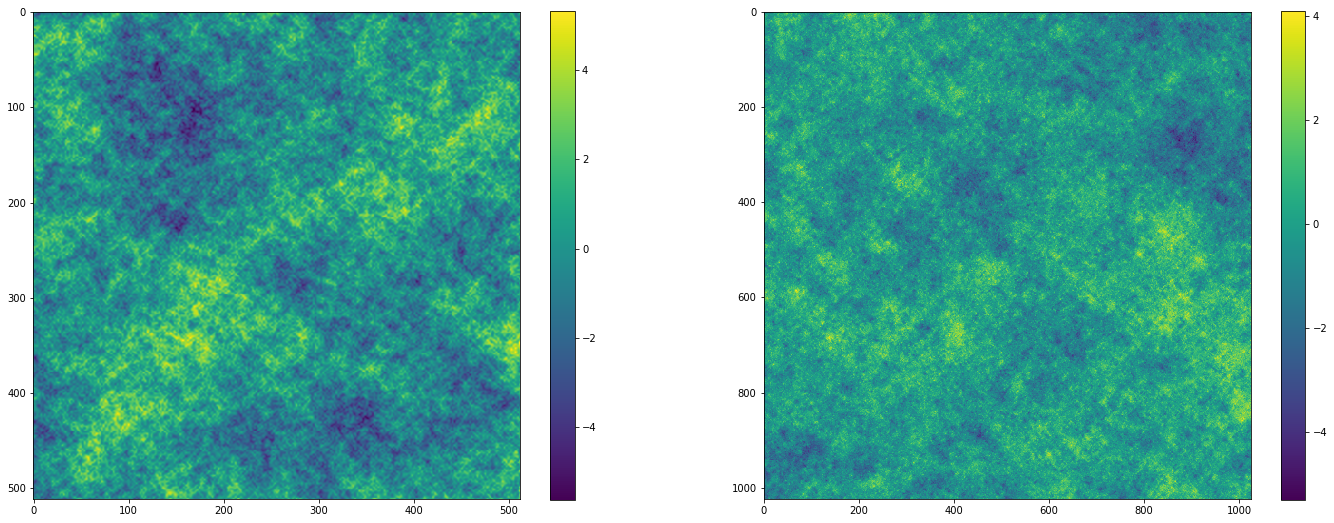

In [397]:
figure(figsize=(24,9))
plt.subplot(1,2,1)
imshow(total)
colorbar()
plt.subplot(1,2,2)
#imshow(total1,vmin=-0.1*10**-5,vmax=0.1*10**-5)
imshow(total1)
colorbar()

In [398]:
tab_k, spec_k = powspec(total, reso=1.)
tab_k1, spec_k1 = powspec(total1, reso=1.)

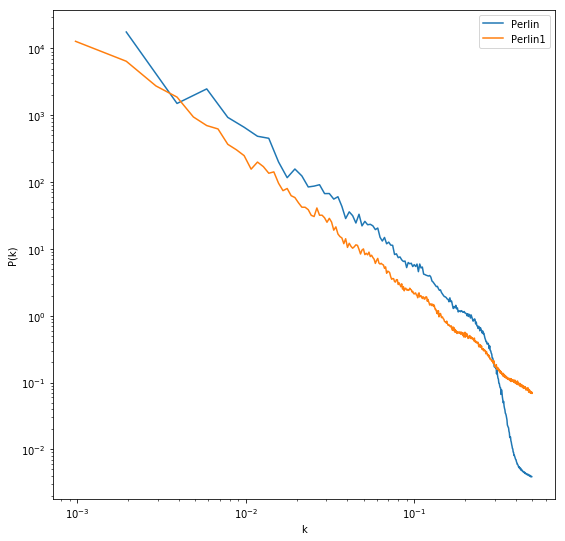

In [399]:
    figure(figsize=(9,9))
    plot(tab_k, spec_k, label='Perlin')
    plot(tab_k1, spec_k1, label='Perlin1')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend()

In [400]:
H=range(1,7)

taw=np.zeros(np.size(H))

for i in range(0,np.size(H)):

    
    h=H[i]
    print(h)
    #Calculate the Fan wavelet transforms
    #wtlog, S11a, wav_k, S1a, q = fan_trans(logfbm, reso=1, q=0, qdyn=False)

    #Set a list of q that are all starting at 2.5
    #The q parameter sets the "sensitivity" to non-Gaussianities in a distribution
    wt, S11a, wav_k, S1a, q = fan_trans(total1, reso=1, q=0 ,h=h, qdyn=True, skewl=0.4)
    
    maxscale=2*np.pi/0.021507722450456238
    minscale=2*np.pi/0.49067146551544943
    kmaxscale=2*np.pi/maxscale
    kminscale=2*np.pi/minscale
    a=np.where(wav_k>=kmaxscale)[0][0]
    b=np.where(wav_k>=kminscale)[0][0]
    ab=range(a,b+1)

    taw[i]=-linregress(log(wav_k[ab]),log(S1a[ab])).slope
    
    
    '''
    q=[]
    q=[2.9]*M
    #Wavelet power spectrum where the q parameter is dynamic and will converge
    #to its optimal value as a function of scales and angles according to the skewness
    #of the wavelet coefficients distribution.
    #wtm, S11a, wav_km, S1am, q = fan_trans(fbmm, reso=1, q=q, qdyn=True, skewl=0.4)
    wtfb, S11a, wav_kfb, S1afb, q = fan_trans(total1, reso=1, q=q, h=h, qdyn=True, skewl=0.4)
    '''

1
2
3
4
5
6


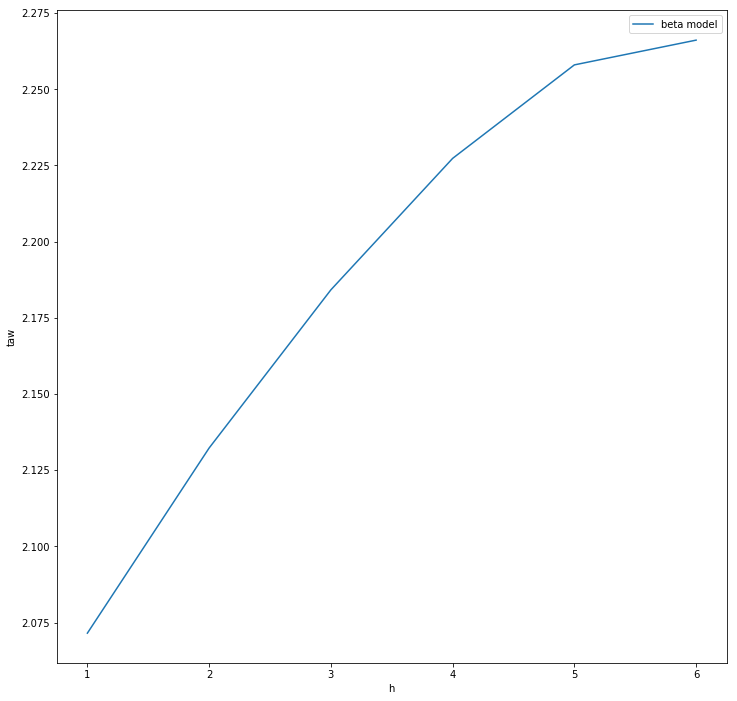

In [401]:
figure(figsize=(12,12))
plot(H,taw,label='beta model')
plt.xlabel('h')
plt.ylabel('taw')
plt.legend()

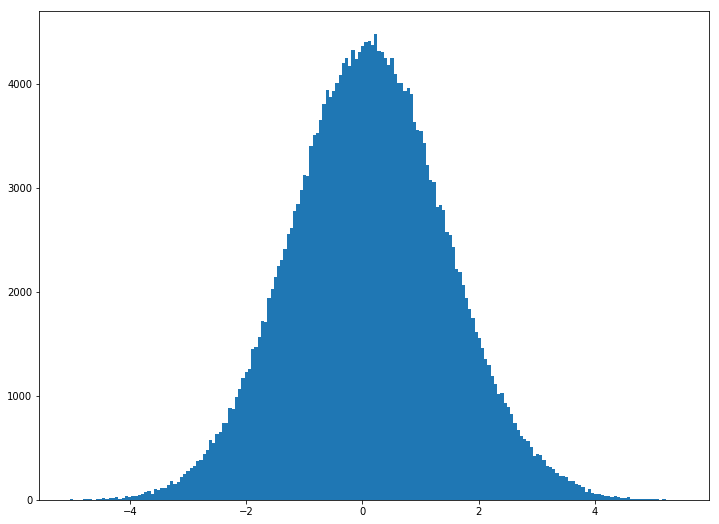

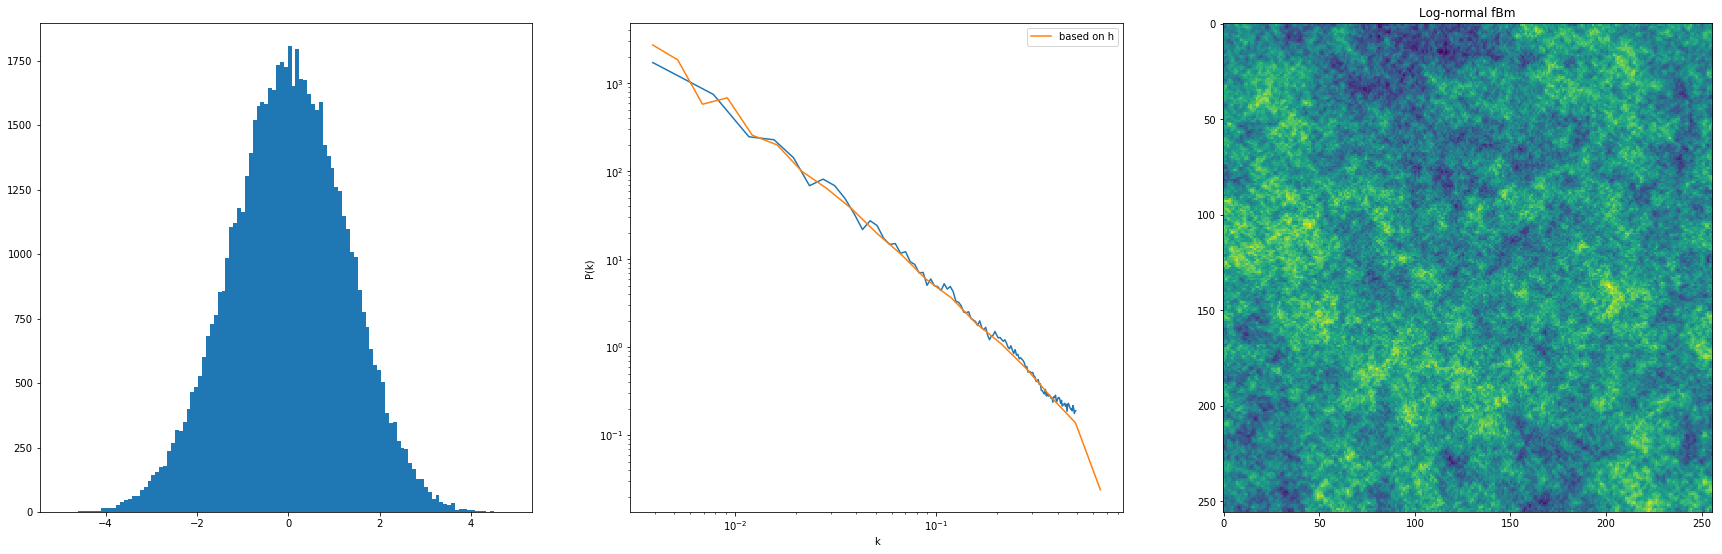

In [341]:
    mergedp  = list(itertools.chain.from_iterable(total))
    mergedp1  = list(itertools.chain.from_iterable(total1))

    figure(figsize=(12,9))
    plt.hist(mergedp,bins='auto', label='Log-normal fBm')
    plt.show()
    
    figure(figsize=(30,9))
    plt.subplot(1,3,1)
    plt.hist(mergedp1,bins='auto', label='Log-normal fBm')
    plt.subplot(1,3,2)
    plot(tab_k1,spec_k1)
    plot(wav_k, S1a, label='based on h')
    #plot(wav_kfb, S1afb[1,:], 's', label='non-gaussian-wavelet')
    #plot(wav_kfb, S1afb[2,:], '^', label='gaussian-wavelet')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend()
    plt.subplot(1,3,3)
    imshow(total1)
    plt.title('Log-normal fBm')
    plt.show()